Q1.CRIME

In [11]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
crime=pd.read_csv('/content/crime_data.csv')
crime

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
def norm(i):
  x=(i-i.min())/i.max()-i.min()
  return x

In [ ]:
df_norm=norm(crime.iloc[:,1:])
df_norm

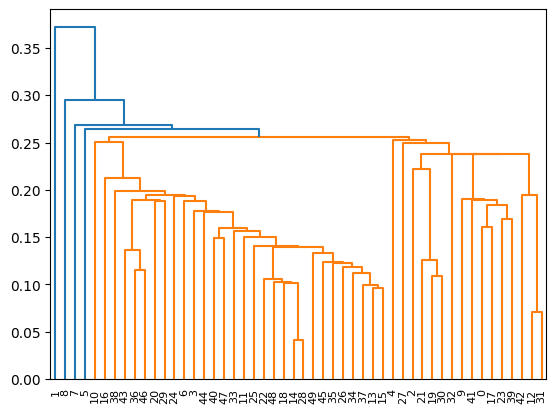

In [13]:
dend=sch.dendrogram(sch.linkage(df_norm,method='single'))

In [19]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')
hc

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=4)

In [21]:
#save clusters
y_hc=hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc,columns=['clusters'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [22]:
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
clusters

In [34]:
#mapping
crime['cluster_id']=clusters
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [35]:
crime1=crime.rename({'Unnamed: 0' : 'US Cities'},axis=1)

In [ ]:
crime1

In [ ]:
crime2=crime1.sort_values('cluster_id')
crime2.iloc[:,[0,5]]

In [38]:
#k-means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
km=pd.read_csv('/content/crime_data.csv')
km

In [ ]:
km.head()

In [41]:
km.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [43]:
km1=km.rename({'Unnamed: 0' : 'US Cities'},axis=1)

In [ ]:
km1

In [ ]:
scaled_km_df=scaler.fit_transform(km1.iloc[:,1:])
scaled_km_df

In [ ]:
#optimum no of clusters

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0)
  kmeans.fit(scaled_km_df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
wcss

In [51]:
kmeans=KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_km_df)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [52]:
clusters_new=KMeans(4,random_state=50)
new_predict=clusters_new.fit_predict(scaled_km_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
clusters_new.labels_

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [66]:
km1['clusterid_new']=new_predict

In [ ]:
km1

In [68]:
km1.groupby('clusterid_new').agg(['mean']).reset_index()


<ipython-input-68-23778e53e003>:1: FutureWarning: ['US Cities'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  km1.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,3.600000,78.538462,52.076923,12.176923
2,2,10.815385,257.384615,76.000000,33.192308
3,3,13.937500,243.625000,53.750000,21.412500


In [69]:
km1[km1['clusterid_new']==0]

,US Cities,Murder,Assault,UrbanPop,Rape,clusterid_new
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [70]:
km1[km1['clusterid_new']==1]

,US Cities,Murder,Assault,UrbanPop,Rape,clusterid_new
11,Idaho,2.6,120,54,14.2,1
14,Iowa,2.2,56,57,11.3,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1
40,South Dakota,3.8,86,45,12.8,1


In [71]:
km1[km1['clusterid_new']==2]

,US Cities,Murder,Assault,UrbanPop,Rape,clusterid_new
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [72]:
km1[km1['clusterid_new']==3]

,US Cities,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,3
3,Arkansas,8.8,190,50,19.5,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [87]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
db=pd.read_csv('/content/crime_data.csv')
db


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [89]:
db1=km.rename({'Unnamed: 0' : 'US Cities'},axis=1)

In [90]:
db1.head()

,US Cities,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2


In [91]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   US Cities      50 non-null     object 
 1   Murder         50 non-null     float64
 2   Assault        50 non-null     int64  
 3   UrbanPop       50 non-null     int64  
 4   Rape           50 non-null     float64
 5   clusterid_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB


In [92]:
db1.drop(['US Cities'],axis=1,inplace=True)

In [93]:
array=db1.values

In [ ]:
array

In [101]:
scaler=StandardScaler()
scale=scaler.fit_transform(array)

In [ ]:
scale

In [103]:
dbs=DBSCAN(eps=0.8,min_samples=7)
dbs.fit(scale)

DBSCAN(eps=0.8, min_samples=7)

In [104]:
dbs.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [108]:
db1['cluster']=dbs.labels_

In [110]:
db1.head()

,Murder,Assault,UrbanPop,Rape,clusterid_new,cluster
0,13.2,236,58,21.2,3,-1
1,10.0,263,48,44.5,2,-1
2,8.1,294,80,31.0,2,-1
3,8.8,190,50,19.5,3,-1
4,9.0,276,91,40.6,2,-1


Q2.AIRLINES

In [123]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
air=pd.read_csv('/content/EeastWestAirlines.csv')

In [120]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [121]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [114]:
def df_air(i): #stdztn
 x=(i-i.min())/i.max()-i.min()
 return x

In [ ]:
air1=df_air(air.iloc[:,1:])
air1

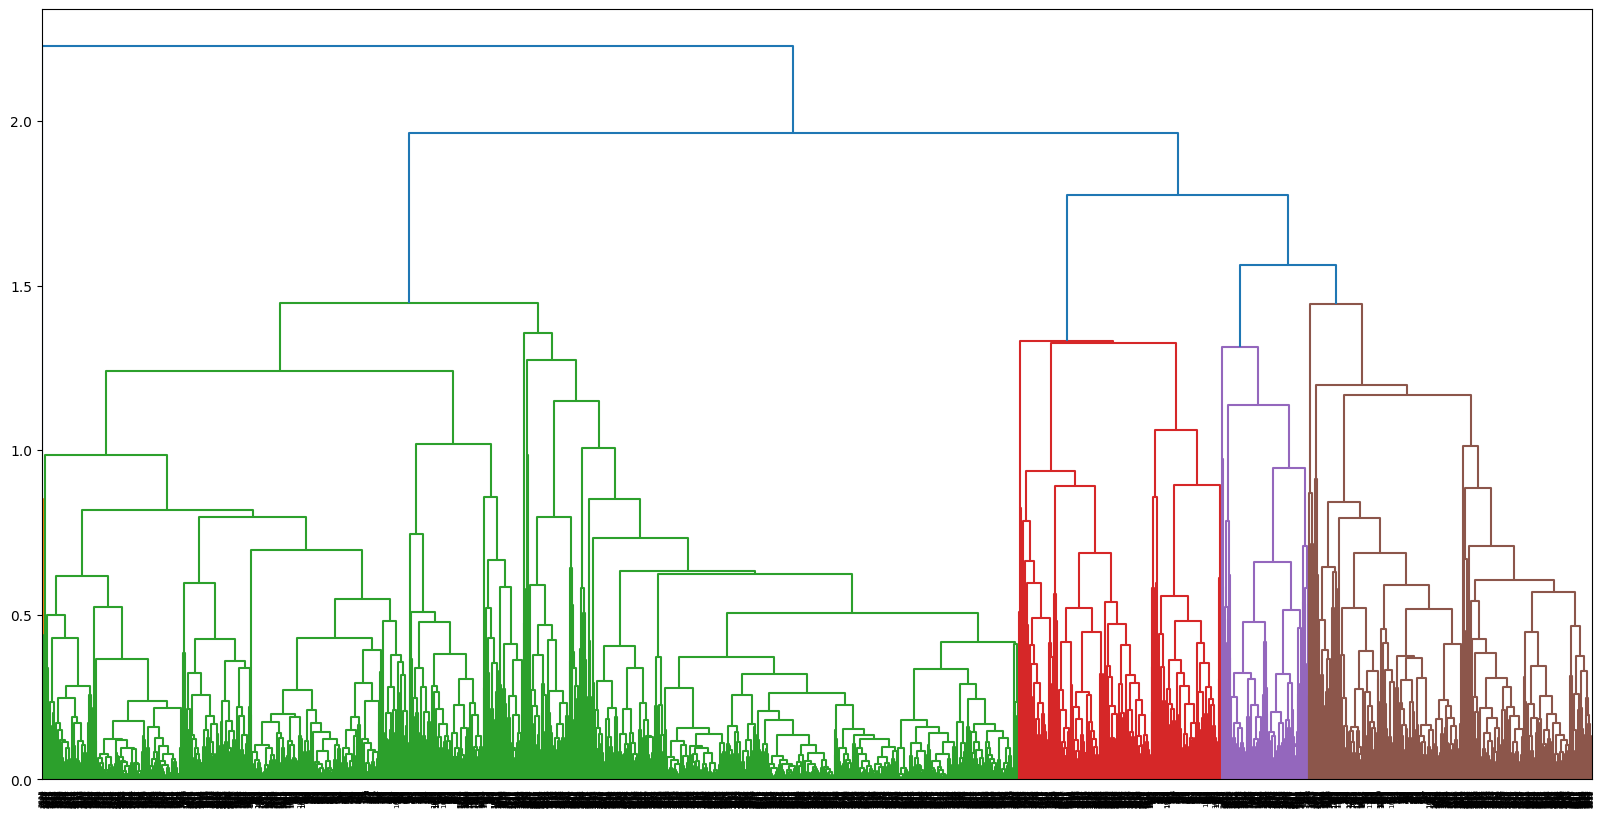

In [119]:
fig=plt.figure(figsize=(20,10))
dend=sch.dendrogram(sch.linkage(air1,method='complete'))

In [126]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [127]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=3)

In [129]:
y_hc=hc.fit_predict(air1)
clusters=pd.DataFrame(y_hc,columns=['clusters'])
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 1])

In [130]:
air1['h_clusterid']=clusters

In [ ]:
air1


In [132]:
air2=air1.sort_values('h_clusterid')
air2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,-0.2,-1.0,-1.0,0.371644,0.290698,0.011357,0.056604,-1.465043,1.0,0
1513,0.073189,0.152853,-1.0,-1.0,-1.0,0.043855,0.093023,0.022715,0.037736,-1.415984,1.0,0
1512,0.002803,0.000000,-1.0,-1.0,-1.0,0.002275,0.023256,0.000000,0.000000,-1.406461,1.0,0
3165,0.114272,0.000000,-1.0,-1.0,-1.0,0.078965,0.290698,0.215693,0.226415,-1.708052,1.0,0
3167,0.010478,0.000000,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,-1.755786,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1764,0.041363,0.000000,-1.0,-1.0,-1.0,0.007585,0.034884,0.032450,0.037736,-1.463838,0.0,1
1768,0.058267,0.000000,-0.6,-1.0,-1.0,0.053833,0.162791,0.016225,0.018868,-1.463476,0.0,1
1755,0.020657,0.000000,-1.0,-1.0,-1.0,0.037769,0.162791,0.000000,0.000000,-1.460101,0.0,1
3998,0.001769,0.000000,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,-1.831726,0.0,1


In [134]:
air2.iloc[:,[0,11]]

,Balance,h_clusterid
1999,0.191881,0
1513,0.073189,0
1512,0.002803,0
3165,0.114272,0
3167,0.010478,0
...,...,...
1764,0.041363,1
1768,0.058267,1
1755,0.020657,1
3998,0.001769,1


In [135]:
kair=pd.read_csv('/content/EeastWestAirlines.csv')
kair.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [136]:
scaler=StandardScaler()
scaled_kair=scaler.fit_transform(kair.iloc[:,1:])

In [ ]:
scaled_kair

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

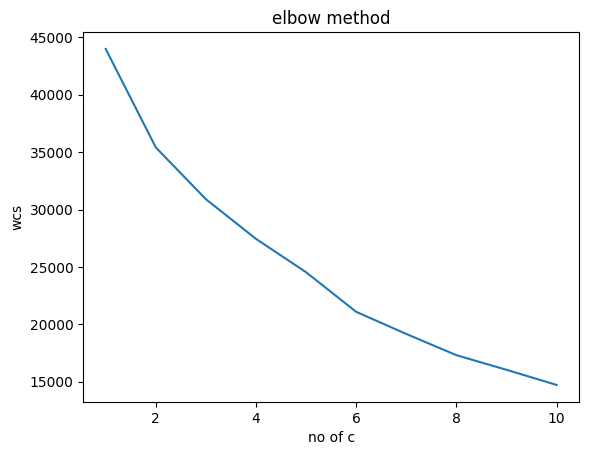

In [143]:
wcs=[]
for i in range(1,11):
  kmn=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0)
  kmn.fit(scaled_kair)
  wcs.append(kmn.inertia_)

plt.plot(range(1,11),wcs)
plt.title('elbow method')
plt.xlabel('no of c')
plt.ylabel('wcs')
plt.show()

In [144]:
wcs

[43989.000000000015,
 35409.511452424376,
 30899.24682465222,
 27446.372456681347,
 24541.329582045757,
 21089.973628929638,
 19165.86145865565,
 17316.866446128264,
 16043.406242309495,
 14726.983322766802]

In [145]:
kmeans=KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_kair)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [148]:
clusters_new=KMeans(n_clusters=3,random_state=42)
new_predict=clusters_new.fit_predict(scaled_kair)
clusters_new.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [149]:
kair['clusterid_new']=new_predict
kair

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [152]:
clusters_new.cluster_centers_

array([[ 0.43048887,  0.01642516,  1.21446998, -0.08210144,  0.11218848,
         0.96375606,  0.76629019, -0.08399898, -0.09536197,  0.3709822 ,
         0.58512867],
       [ 1.23330946,  0.82316979,  0.06616141,  0.14658734,  0.09152624,
         0.59705278,  1.61043356,  3.50959072,  3.77863606,  0.29612364,
         0.90472058],
       [-0.29009901, -0.061121  , -0.59829079,  0.03070404, -0.06077648,
        -0.50989885, -0.47866796, -0.18525149, -0.19704462, -0.20055288,
        -0.34454569]])

In [153]:
kair.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1600.795870,116978.705322,156.820492,3.731533,1.002383,1.034154,40417.577442,18.960286,342.454329,1.011914,4884.591739,0.652899
1,1,1711.421687,197873.367470,780.891566,2.150602,1.036145,1.030120,31562.445783,27.066265,5373.602410,15.704819,4730.018072,0.807229
2,2,2236.893939,44370.062160,96.833333,1.235820,1.019037,1.000389,4831.835276,7.005439,200.697358,0.626263,3704.442502,0.203963


In [154]:
kair[kair['clusterid_new']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,0
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,0
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,0
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0


In [155]:
kair[kair['clusterid_new']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,1
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,1
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,1
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,1


In [156]:
#dbscan
aird=pd.read_csv('/content/EeastWestAirlines.csv')
aird.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [157]:
aird.drop(['ID#','Award?'],axis=1,inplace=True)

In [158]:
aird.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [159]:
array=aird.values
array

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]])

In [160]:
sts=StandardScaler()
x=sts.fit_transform(array)
dbs=DBSCAN(eps=0.8,min_samples=7)
dbs.fit(x)

DBSCAN(eps=0.8, min_samples=7)

In [161]:
dbs.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
aird['cluster']=dbs.labels_

In [164]:
aird.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,-1
